In [ ]:
! pip install --upgrade category_encoders

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD

#Read CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('cell.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466739 entries, 0 to 466738
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      0 non-null       float64
 1   Use CaseType (Input 1)          466739 non-null  object 
 2   LTE/5G UE Category (Input 2)    466739 non-null  object 
 3   Technology Supported (Input 3)  466739 non-null  object 
 4   Day (Input4)                    466739 non-null  object 
 5   Time (Input 5)                  466739 non-null  int64  
 6   QCI (Input 6)                   466739 non-null  int64  
 7   Packet Loss Rate (Reliability)  466739 non-null  float64
 8   Packet Delay Budget (Latency)   466739 non-null  object 
 9   Slice Type (Output)             466739 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 35.6+ MB


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466739 entries, 0 to 466738
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Use CaseType (Input 1)          466739 non-null  object 
 1   LTE/5G UE Category (Input 2)    466739 non-null  object 
 2   Technology Supported (Input 3)  466739 non-null  object 
 3   Day (Input4)                    466739 non-null  object 
 4   Time (Input 5)                  466739 non-null  int64  
 5   QCI (Input 6)                   466739 non-null  int64  
 6   Packet Loss Rate (Reliability)  466739 non-null  float64
 7   Packet Delay Budget (Latency)   466739 non-null  object 
 8   Slice Type (Output)             466739 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.0+ MB


#Data Augmentaion

In [ ]:
# Adding random missing values
missing_percentage = 0.07
mask = np.random.rand(*df.shape) < missing_percentage
df[mask] = np.nan

#Pre-processing

In [ ]:
df = df.rename(columns={'Use CaseType (Input 1)': 'Casetype'})
df = df.rename(columns={'LTE/5G UE Category (Input 2)': 'UE_category'})
df = df.rename(columns={'Technology Supported (Input 3)': 'Technology'})
df = df.rename(columns={'Day (Input4)': 'Day'})
df = df.rename(columns={'Time (Input 5)': 'Time'})
df = df.rename(columns={'QCI (Input 6)': 'QCI'})
df = df.rename(columns={'Packet Loss Rate (Reliability)': 'Reliability'})
df = df.rename(columns={'Packet Delay Budget (Latency)': 'Latency'})
df = df.rename(columns={'Slice Type (Output)': 'Slice'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466739 entries, 0 to 466738
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Casetype     434160 non-null  object 
 1   UE_category  434109 non-null  object 
 2   Technology   434186 non-null  object 
 3   Day          433989 non-null  object 
 4   Time         433993 non-null  float64
 5   QCI          433878 non-null  float64
 6   Reliability  433952 non-null  float64
 7   Latency      433963 non-null  object 
 8   Slice        434134 non-null  object 
dtypes: float64(3), object(6)
memory usage: 32.0+ MB


In [ ]:
df['Casetype'].unique()

array(['Smartphone', nan, 'IoT Devices', 'Smart Transportation',
       'Industry 4.0', 'AR/VR/Gaming', 'Healthcare', 'Public Safety/E911',
       'Smart City & Home'], dtype=object)

#Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Casetype','UE_category','Technology','Reliability','Latency','Slice'])
df_encoded

,Day,Time,QCI,Casetype_AR/VR/Gaming,Casetype_Healthcare,Casetype_Industry 4.0,Casetype_IoT Devices,Casetype_Public Safety/E911,Casetype_Smart City & Home,Casetype_Smart Transportation,...,Technology_LTE/5G,Reliability_1e-06,Reliability_0.001,Reliability_0.01,Latency_<10ms,Latency_<300ms,Latency_<50ms,Slice_URLLC,Slice_eMBB,Slice_mMTC
0,Monday,1.0,1.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,Monday,1.0,2.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,Monday,1.0,3.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,Monday,1.0,4.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,Monday,1.0,65.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466734,Sunday,NaN,7.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
466735,Sunday,23.0,8.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
466736,Sunday,23.0,9.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
466737,Sunday,23.0,69.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


<ipython-input-15-b2f006a9567c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


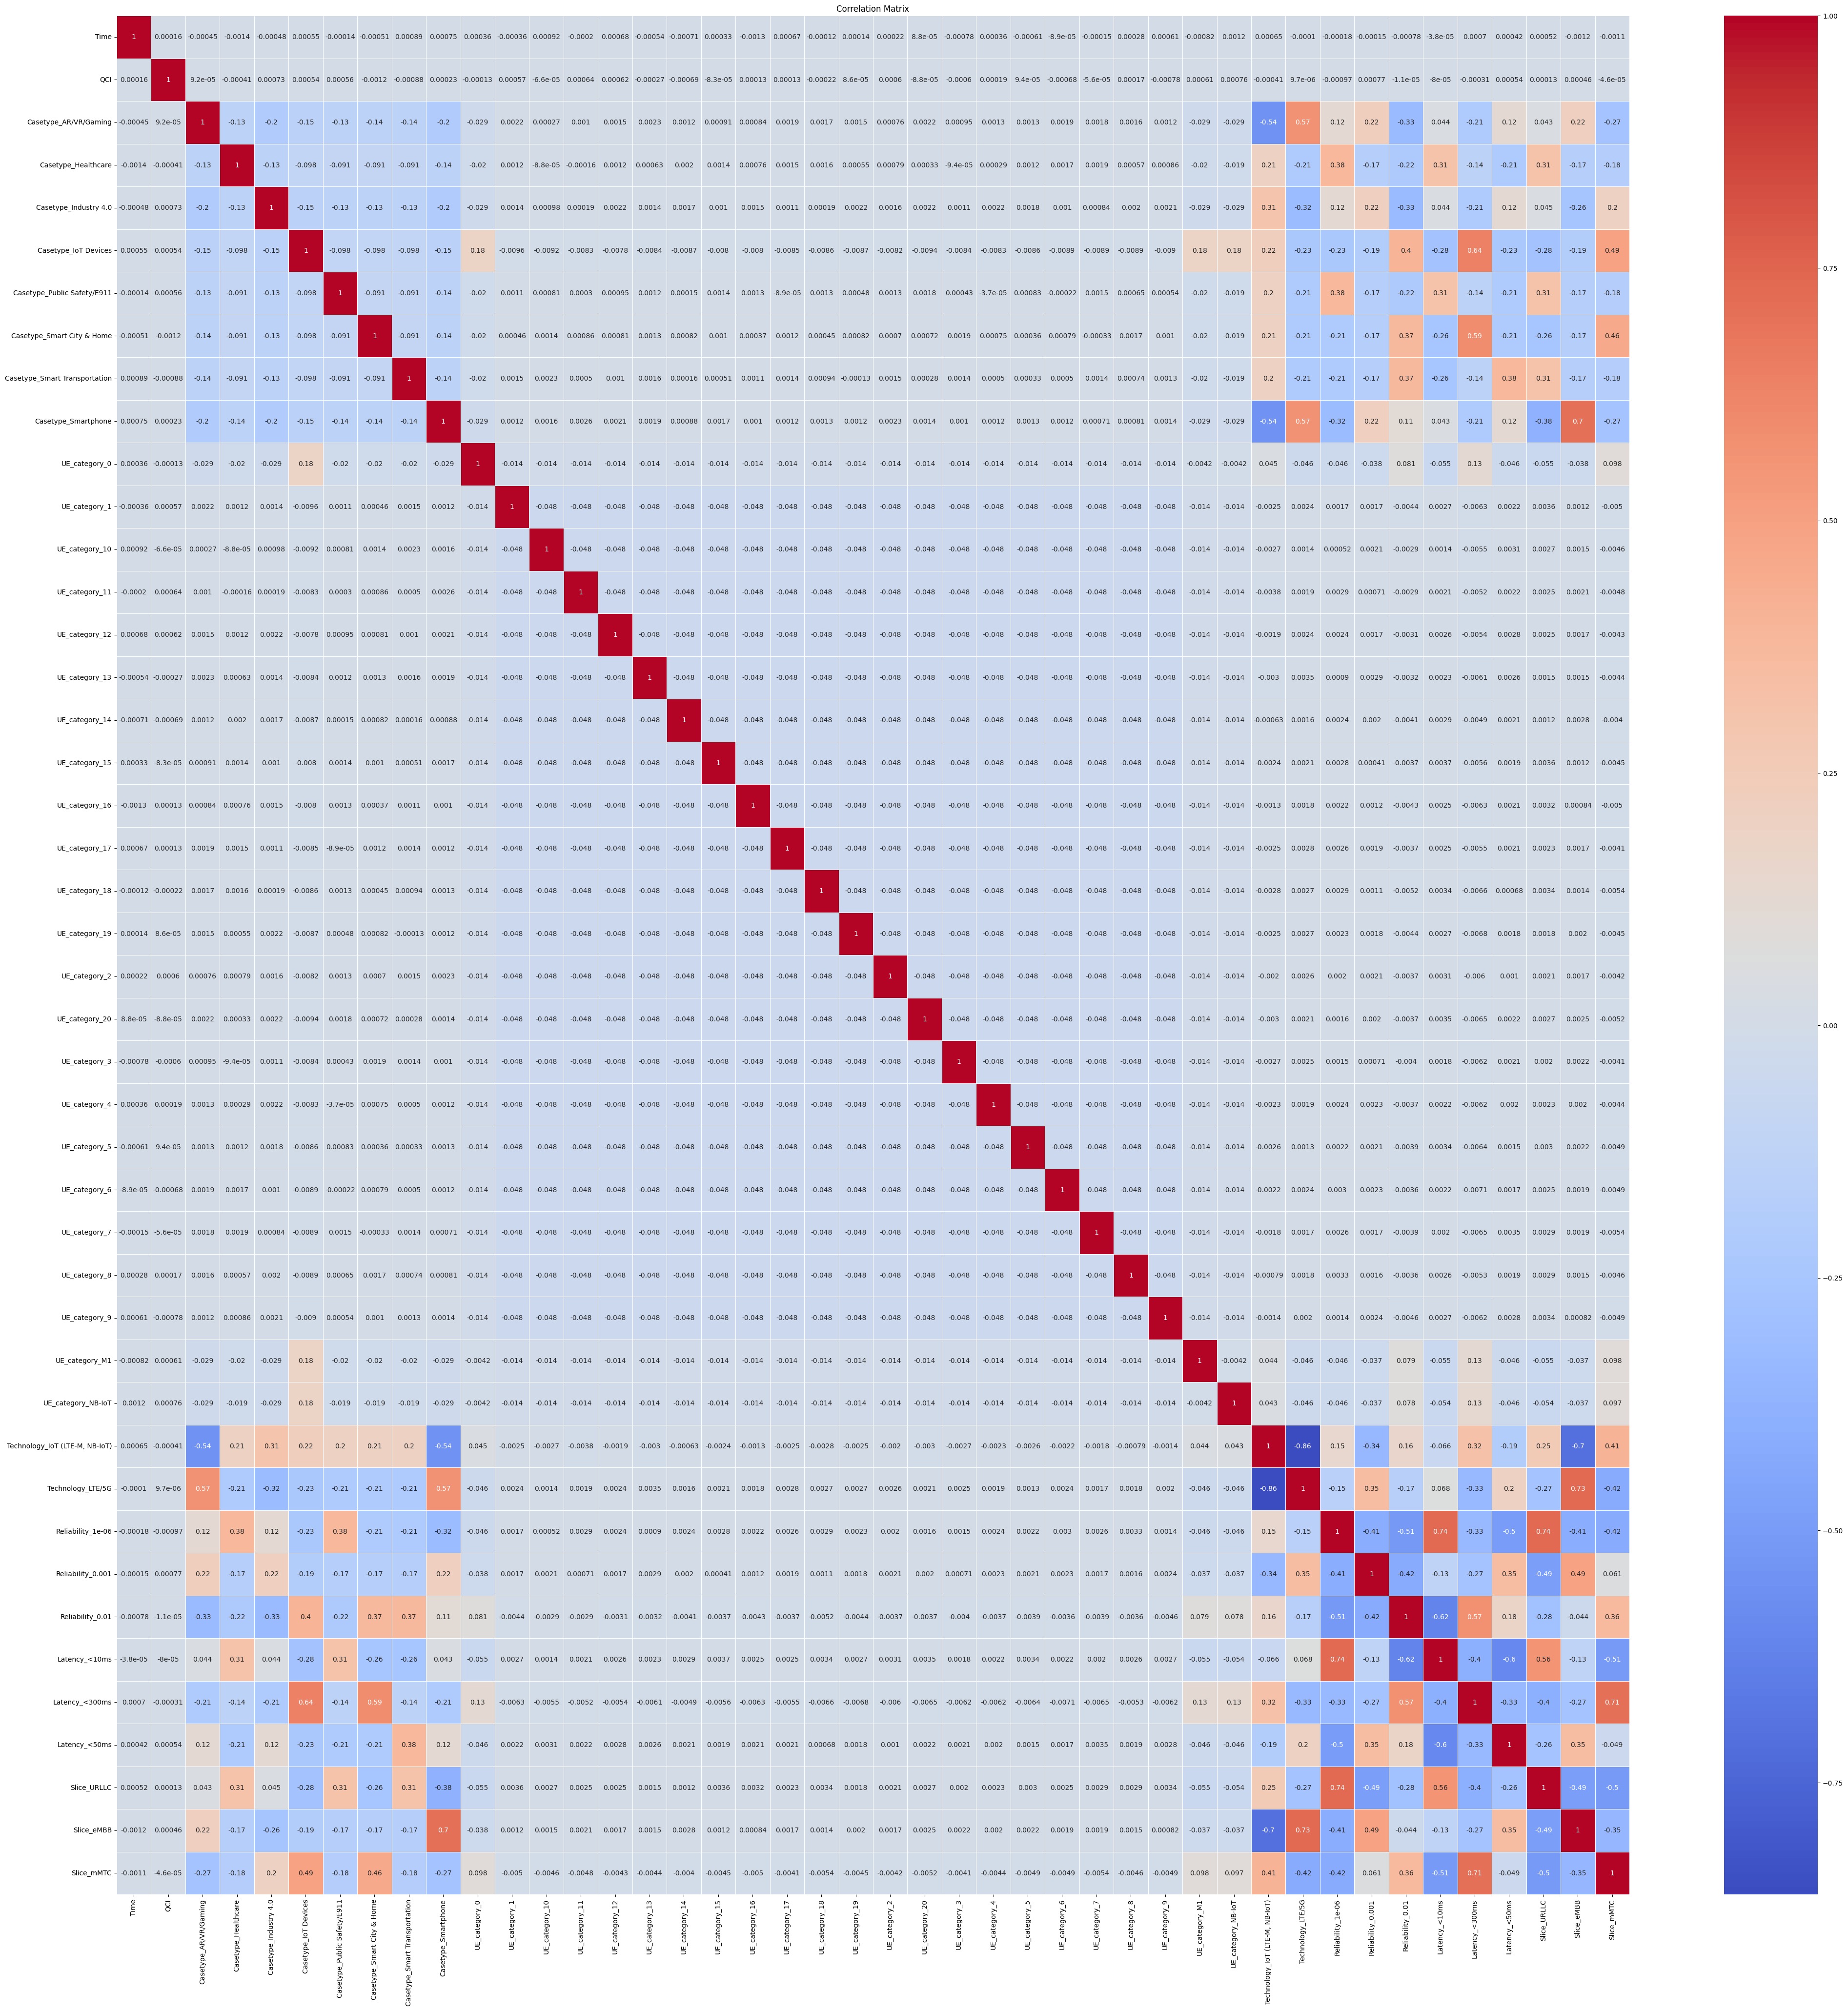

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(50,50))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df_encoded.columns

Index(['Day', 'Time', 'QCI', 'Casetype_AR/VR/Gaming', 'Casetype_Healthcare',
       'Casetype_Industry 4.0', 'Casetype_IoT Devices',
       'Casetype_Public Safety/E911', 'Casetype_Smart City & Home',
       'Casetype_Smart Transportation', 'Casetype_Smartphone', 'UE_category_0',
       'UE_category_1', 'UE_category_10', 'UE_category_11', 'UE_category_12',
       'UE_category_13', 'UE_category_14', 'UE_category_15', 'UE_category_16',
       'UE_category_17', 'UE_category_18', 'UE_category_19', 'UE_category_2',
       'UE_category_20', 'UE_category_3', 'UE_category_4', 'UE_category_5',
       'UE_category_6', 'UE_category_7', 'UE_category_8', 'UE_category_9',
       'UE_category_M1', 'UE_category_NB-IoT',
       'Technology_IoT (LTE-M, NB-IoT)', 'Technology_LTE/5G',
       'Reliability_1e-06', 'Reliability_0.001', 'Reliability_0.01',
       'Latency_<10ms', 'Latency_<300ms', 'Latency_<50ms', 'Slice_URLLC',
       'Slice_eMBB', 'Slice_mMTC'],
      dtype='object')

In [ ]:
abc=['Slice_URLLC','Slice_eMBB', 'Slice_mMTC']
y=df_encoded[abc].copy()
y

,Slice_URLLC,Slice_eMBB,Slice_mMTC
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
466734,1,0,0
466735,1,0,0
466736,1,0,0
466737,1,0,0


In [ ]:
y.head()

,Slice_URLLC,Slice_eMBB,Slice_mMTC
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
columns_to_drop = ['Slice_URLLC','Slice_eMBB', 'Slice_mMTC','Day','QCI','Time']  #add latency/rel
X = df_encoded.drop(columns=columns_to_drop)

In [ ]:
X.head()

,Casetype_AR/VR/Gaming,Casetype_Healthcare,Casetype_Industry 4.0,Casetype_IoT Devices,Casetype_Public Safety/E911,Casetype_Smart City & Home,Casetype_Smart Transportation,Casetype_Smartphone,UE_category_0,UE_category_1,...,UE_category_M1,UE_category_NB-IoT,"Technology_IoT (LTE-M, NB-IoT)",Technology_LTE/5G,Reliability_1e-06,Reliability_0.001,Reliability_0.01,Latency_<10ms,Latency_<300ms,Latency_<50ms
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
X.columns

Index(['Casetype_AR/VR/Gaming', 'Casetype_Healthcare', 'Casetype_Industry 4.0',
       'Casetype_IoT Devices', 'Casetype_Public Safety/E911',
       'Casetype_Smart City & Home', 'Casetype_Smart Transportation',
       'Casetype_Smartphone', 'UE_category_0', 'UE_category_1',
       'UE_category_10', 'UE_category_11', 'UE_category_12', 'UE_category_13',
       'UE_category_14', 'UE_category_15', 'UE_category_16', 'UE_category_17',
       'UE_category_18', 'UE_category_19', 'UE_category_2', 'UE_category_20',
       'UE_category_3', 'UE_category_4', 'UE_category_5', 'UE_category_6',
       'UE_category_7', 'UE_category_8', 'UE_category_9', 'UE_category_M1',
       'UE_category_NB-IoT', 'Technology_IoT (LTE-M, NB-IoT)',
       'Technology_LTE/5G', 'Reliability_1e-06', 'Reliability_0.001',
       'Reliability_0.01', 'Latency_<10ms', 'Latency_<300ms', 'Latency_<50ms'],
      dtype='object')

#Test-Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [ ]:
len(X_train)

373391

In [ ]:
len(X_test)

93348

In [ ]:
input_shape = [X_train.shape[1]]

#Model Pipeline Building

Epoch 1/200
584/584 [==============================] - 24s 32ms/step - loss: 0.0288 - mse: 0.0288 - accuracy: 0.9532 - val_loss: 0.0237 - val_mse: 0.0237 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 2/200
584/584 [==============================] - 13s 23ms/step - loss: 0.0248 - mse: 0.0248 - accuracy: 0.9582 - val_loss: 0.0237 - val_mse: 0.0237 - val_accuracy: 0.9599 - lr: 9.0000e-04
Epoch 3/200
584/584 [==============================] - 13s 22ms/step - loss: 0.0246 - mse: 0.0246 - accuracy: 0.9584 - val_loss: 0.0236 - val_mse: 0.0236 - val_accuracy: 0.9598 - lr: 8.1000e-04
Epoch 4/200
584/584 [==============================] - 13s 23ms/step - loss: 0.0244 - mse: 0.0244 - accuracy: 0.9585 - val_loss: 0.0232 - val_mse: 0.0232 - val_accuracy: 0.9600 - lr: 7.2900e-04
Epoch 5/200
584/584 [==============================] - 13s 22ms/step - loss: 0.0242 - mse: 0.0242 - accuracy: 0.9585 - val_loss: 0.0231 - val_mse: 0.0231 - val_accuracy: 0.9599 - lr: 6.5610e-04
Epoch 6/200
584/584 [=============

<Axes: title={'center': 'Accuracy'}>

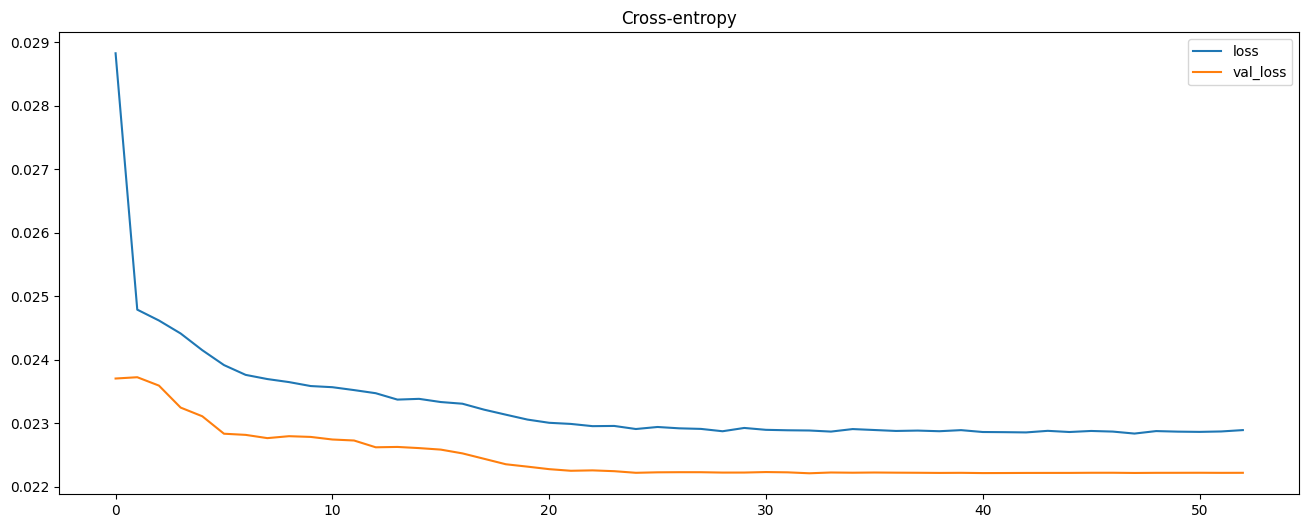

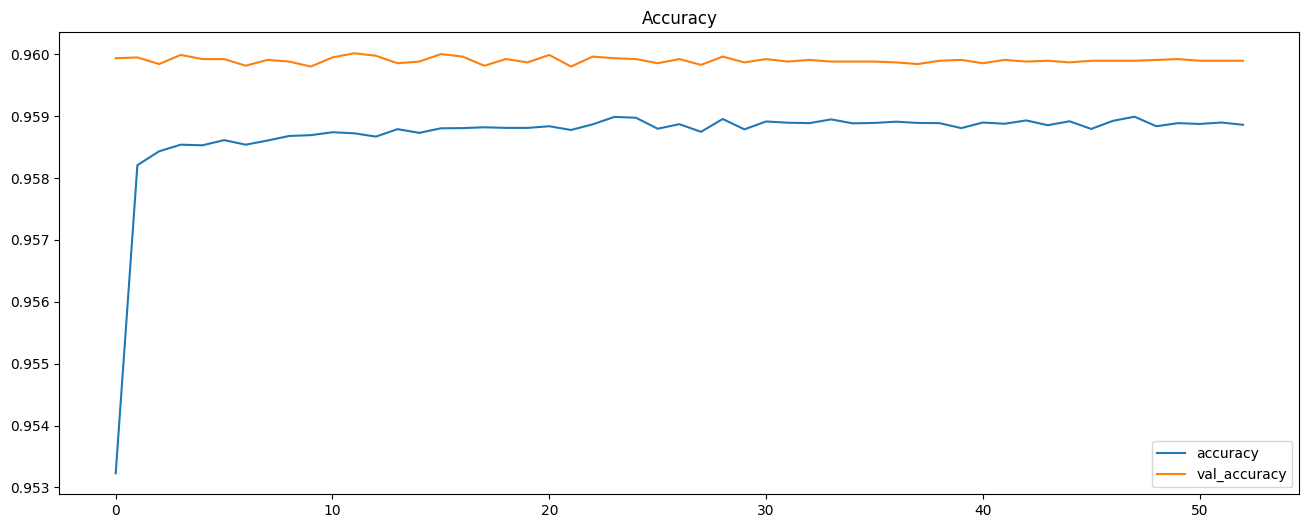

In [ ]:
#model pipeline
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation= 'relu',),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation= 'relu',),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(3, activation='sigmoid'),
])

# Defining a simple learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.001  # Initial learning rate
    decay = 0.9  # Learning rate decay factor
    lr = initial_lr * decay**epoch
    return lr

# Creating a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse','accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping, lr_scheduler],
)

#Model Evaluation
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy", figsize=(16, 6))
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy", figsize=(16, 6))

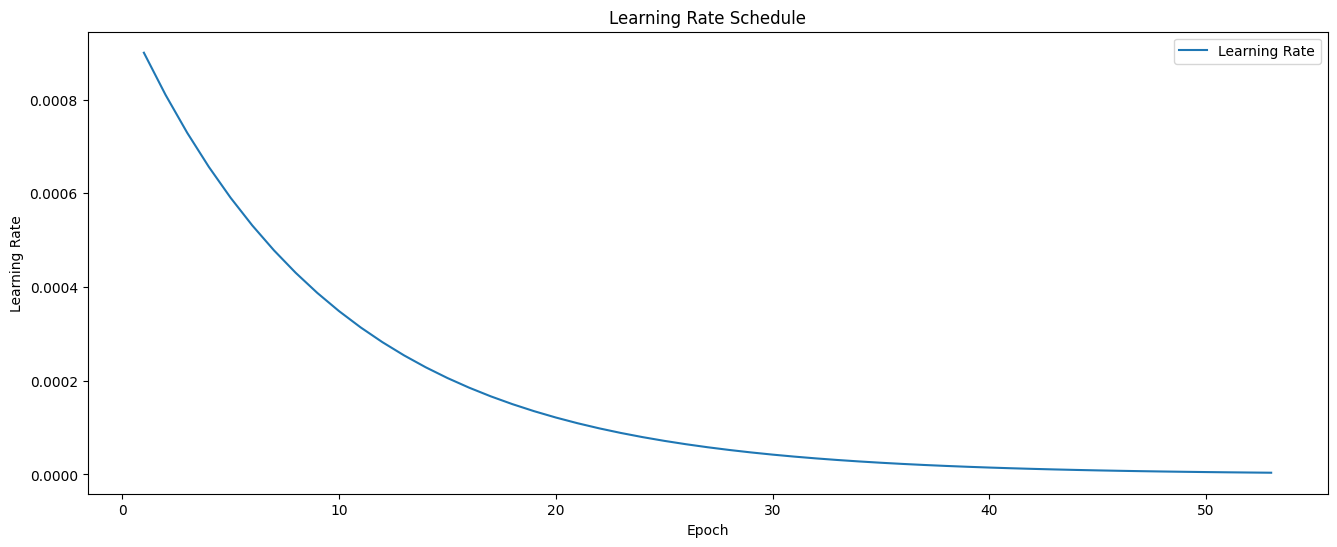

In [ ]:
#Visualize Learning Rate Schedule
epochs = range(1, len(history.history['accuracy']) + 1)
learning_rates = [lr_schedule(epoch) for epoch in epochs]

plt.figure(figsize=(16, 6))
plt.plot(epochs, learning_rates, label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

In [ ]:
# Convert one-hot encoded labels to categorical labels
y_true = np.argmax(y.values, axis=1)

# Make predictions on the validation set
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)
target_columns= abc

14586/14586 [==============================] - 30s 2ms/step


#Visualization of Slice Prediction Accuracy Via Classification Reports




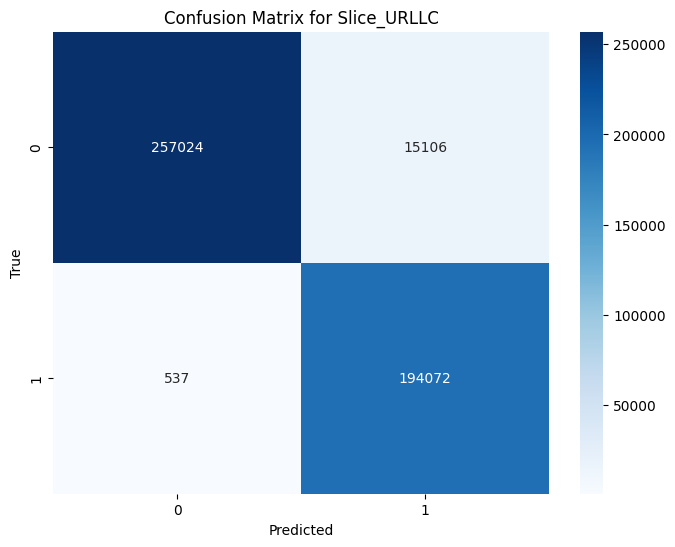

Classification Report for Slice_URLLC:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    272130
           1       0.93      1.00      0.96    194609

    accuracy                           0.97    466739
   macro avg       0.96      0.97      0.97    466739
weighted avg       0.97      0.97      0.97    466739



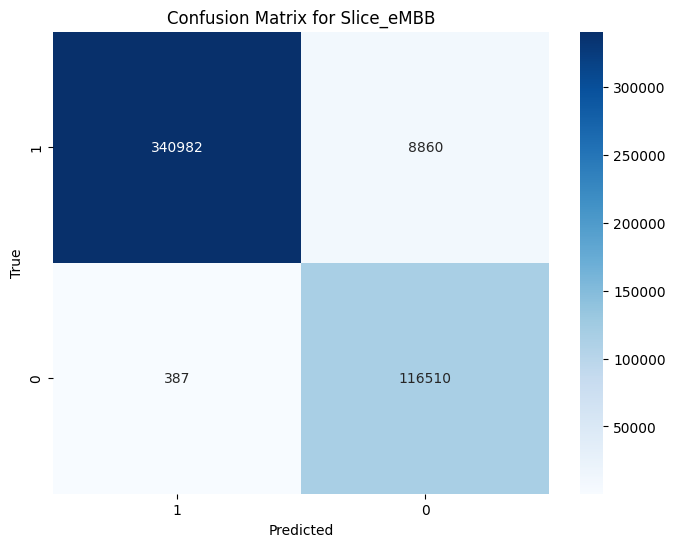

Classification Report for Slice_eMBB:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    349842
           1       0.93      1.00      0.96    116897

    accuracy                           0.98    466739
   macro avg       0.96      0.99      0.97    466739
weighted avg       0.98      0.98      0.98    466739



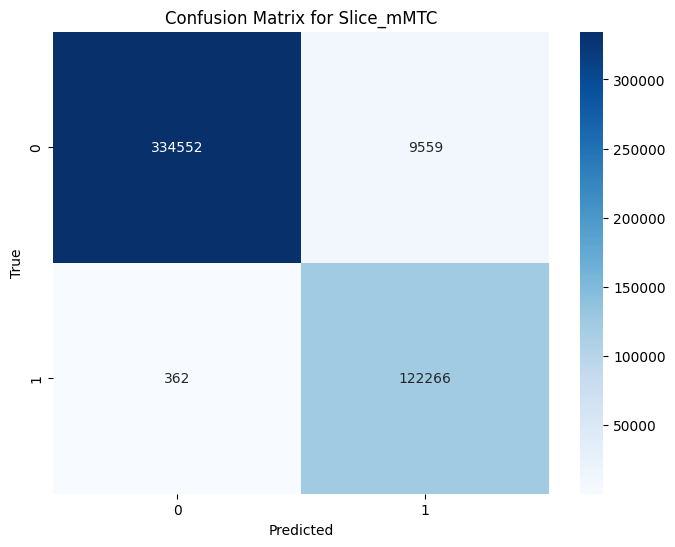

Classification Report for Slice_mMTC:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    344111
           1       0.93      1.00      0.96    122628

    accuracy                           0.98    466739
   macro avg       0.96      0.98      0.97    466739
weighted avg       0.98      0.98      0.98    466739



In [ ]:
y_onehot= y
for i, target_column in enumerate(target_columns):
    target_values = df_encoded[target_column].unique()
    target_true = y_onehot[target_column].values
    target_pred_prob = y_pred_prob[:, i]  # Predicted probabilities for the current target column
    target_pred = (target_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions using a threshold

    cm = confusion_matrix(target_true, target_pred)
    classification_rep = classification_report(target_true, target_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_values, yticklabels=target_values)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {target_column}')
    plt.show()

    # Display the classification report
    print(f'Classification Report for {target_column}:\n{classification_rep}')